In [1]:
# Import Dependencies
import numpy as np
import pandas as pd
import random as rd
from random import randint
import matplotlib.pyplot as plt

In [2]:
def fitness_calculation(weight, value, population, threshold):
    """
    This method calculates the fitness of the population provided.
    The fitness of a population is the sum of the values for the items present

    :param weight: array
    :param value: array
    :param population: array
    :param threshold: int
    :return: list
    """
    fitness = np.empty(population.shape[0])

    for j in range(population.shape[0]):
        sum_of_values = np.sum(population[j] * value)
        sum_of_weights = np.sum(population[j] * weight)

        # Check if the total weight is less than the threshold
        if sum_of_weights <= threshold:
            fitness[j] = sum_of_values
        else:
            fitness[j] = 0
    return fitness.astype(int)


In [3]:
def selection(fitness, num_parents, population):
    """
    Select the best solutions with the best fitness.
    Here we will do Tournament selection process.
    The output will return the solutions that are ready for 'mating'

    :param fitness: list
    :param num_parents: int
    :param population: array
    :return: array
    """
    fitness = list(fitness)
    fittest_version_of_population = np.empty((num_parents, population.shape[1]))
    # We will now get our fittest_version_of_population through tournament selection
    for i in range(num_parents):
        # we randomly pick an element from the fitness
        index_1 = rd.randint(0, len(fitness) - 1)
        chromosome1 = population[index_1]
        fitness_1 = fitness[index_1]
        # Then get the details of the second potential parent
        index_2 = rd.randint(0, len(fitness) - 1)
        chromosome2 = population[index_2]
        fitness_2 = fitness[index_2]

        # compare which one is fitter and add that chromosome to the population as fittest_version_of_population
        if fitness_1 > fitness_2:
            fittest_version_of_population[i, :] = chromosome1
            # fitness[index_1] = -9999
        else:
            fittest_version_of_population[i, :] = chromosome2
            # fitness[index_2] = -9999

    return fittest_version_of_population


In [4]:
def crossover(parents, num_offsprings):
    """
    This method will perform crossover to produce two children.
    Each of the parents 1 and 2, 2 and 3, 3 and 4, etc.. Will produce two children
    Until the number of required offsprings are reached.

    :param parents:
    :param num_offsprings:
    :return:
    """
    offsprings = np.empty((num_offsprings, parents.shape[1]))
    crossover_point = int(parents.shape[1] / 2)  # half way point
    crossover_rate = 0.8  # we don't always do crossover
    j = 0

    while parents.shape[0] < num_offsprings:
        skip_crossover_value = rd.random()
        if skip_crossover_value > crossover_rate:
            continue
        # Iterating through the parents like a ring using modulo
        parent1_index = j % parents.shape[0]
        parent2_index = (j + 1) % parents.shape[0]
        # The first offspring will have the first parents first half and the second half of the second parent
        offsprings[j, 0:crossover_point] = parents[parent1_index, 0:crossover_point]
        # The second child will have the second parents first half and the first parents second half
        offsprings[j, crossover_point:] = parents[parent2_index, crossover_point:]
        j = +1
    return offsprings


In [5]:
def mutation(offsprings):
    """
    This method will mutate the chromosome.
    For a random position selected in a chromosome;
        If a 1 is present it will be changed to a 0
        if a 0 is present it will be changed to a 1.
    This will occure only if within acceptable mutation rate of 40%

    :param offsprings: array
    :return: array
    """
    mutated_offspring = np.empty(offsprings.shape)
    mutation_rate = 0.4

    for k in range(mutated_offspring.shape[0]):
        skip_mutation_value = rd.random()
        if skip_mutation_value > mutation_rate:
            continue

        mutated_offspring[k, :] = offsprings[k, :]
        random_index = rd.randint(0, offsprings.shape[1] - 1)

        if mutated_offspring[k, random_index] == 0:
            mutated_offspring[k, random_index] = 1
        else:
            mutated_offspring[k, random_index] = 0

    return mutated_offspring


In [6]:
def genetic_algorithm(weight, value, population, population_size, number_of_generations, threshold):
    number_of_parents = int(population_size[0] / 2)
    number_of_offspring = population_size[0] - number_of_parents
    all_fitness_results, algorithm_results = [], []

    # iterate this until the number of generations has been reached
    for i in range(number_of_generations):
        fitness_for_current_population = fitness_calculation(weight, value, population, threshold)
        all_fitness_results.append(fitness_for_current_population)

        parents = selection(fitness_for_current_population, number_of_parents, population)
        offspring_crossover = crossover(parents, number_of_offspring)
        offspring_mutated = mutation(offspring_crossover)

        population[0:parents.shape[0], :] = parents
        population[parents.shape[0]:, :] = offspring_mutated

    print('Last Generateion: \n {} \n'.format(population))
    fitness_last_generation = fitness_calculation(weight, value, population, threshold)
    print('Fitness of the last population: \n {} \n'.format(fitness_last_generation))

    max_fitness = np.where(fitness_last_generation == np.max(fitness_last_generation))

    algorithm_results.append(population[max_fitness[0][0], :])

    return algorithm_results, all_fitness_results


In [7]:
def plot_results(all_fitness_result):
    """
    This method plots the fitness results attained after running the genetic algorithm

    :param all_fitness_result:
    :return:
    """
    fitness_history_mean = [np.mean(fitness) for fitness in all_fitness_result]
    fitness_history_max = [np.max(fitness) for fitness in all_fitness_result]

    plt.plot(list(range(num_generations)), fitness_history_mean, label='Mean Fitness')
    plt.plot(list(range(num_generations)), fitness_history_max, label='Max Fitness')
    plt.legend()
    plt.title('Fitness Results - Sofia Badalova')
    plt.xlabel('Generations')
    plt.ylabel('Fitness')
    plt.show()

The list is as follows:
Item No.   Weight   Value
1          18         78

2          9         35

3          23         89

4          20         36

5          59         94

6          61         75

7          70         74

8          75         79

9          76         80

10          30         16

The population size is: (8, 10)
The initial population looks like: 
 [[1 1 1 0 0 1 1 1 1 1]
 [1 1 0 1 1 0 1 0 0 1]
 [0 1 1 1 1 1 1 0 1 1]
 [0 0 0 1 0 1 0 0 0 0]
 [0 0 1 0 0 0 0 0 1 1]
 [1 1 0 1 0 1 1 1 0 1]
 [0 1 0 1 0 0 1 1 0 0]
 [0 0 0 1 1 0 1 1 1 0]]
Last Generateion: 
 [[1 0 1 1 0 0 0 0 0 1]
 [1 1 1 1 0 0 0 0 0 1]
 [1 1 1 1 0 0 0 0 0 1]
 [1 1 1 1 0 0 0 0 0 1]
 [1 1 1 1 0 0 0 0 0 1]
 [1 1 1 1 0 0 0 0 0 1]
 [1 1 1 1 0 0 0 0 0 1]
 [0 1 1 1 0 0 0 0 0 1]] 

Fitness of the last population: 
 [219 254 254 254 254 254 254 176] 

The optimized parameters for the given inputs are: 
[array([1, 1, 1, 1, 0, 0, 0, 0, 0, 1])]

Selected items that will maximize the knapsack without breaking it

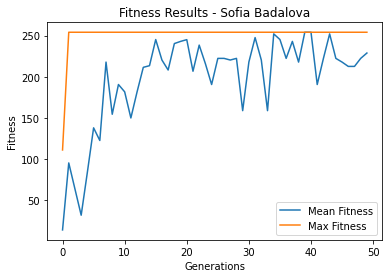

In [10]:
""" 
This is the code to run for problem 1 
"""
if __name__ == '__main__':
    # Setting up variables
    weights = [18, 9, 23, 20, 59, 61, 70, 75, 76, 30]
    values = [78, 35, 89, 36, 94, 75, 74, 79, 80, 16]
    # each value associated with the position in the array is the item number. ( TODO: might not need this )
    items = np.arange(1, 11)

    # The threshold for each problem. The max amount the knapsack can hold.
    threshold_problem_1 = 103
    threshold_problem_2 = 156

    # Print out the arrays to see our items.
    print('The list is as follows:')
    print('Item No.   Weight   Value')
    for i in range(items.shape[0]):
        print('{0}          {1}         {2}\n'.format(items[i], weights[i], values[i]))

    # We set up our population
    solutions_per_population = 8
    # Here we are initialising a random population.
    population_size = (solutions_per_population, items.shape[0])
    initial_population = np.random.randint(2, size=population_size)
    initial_population = initial_population.astype(int)

    # The number of generations that we will go through to get the best solution is
    num_generations = 50

    # Print out our information
    print('The population size is: {}'.format(population_size))
    print('The initial population looks like: \n {}'.format(initial_population))

    parameters, all_fitness_results = genetic_algorithm(weights, values, initial_population, population_size,
                                                        num_generations,
                                                        threshold_problem_1)
    print('The optimized parameters for the given inputs are: \n{}'.format(parameters))
    selected_items = items * parameters
    print('\nSelected items that will maximize the knapsack without breaking it:')
    for i in range(selected_items.shape[1]):
        if selected_items[0][i] != 0:
            print('{}\n'.format(selected_items[0][i]))

    plot_results(all_fitness_results)

The list is as follows:
Item No.   Weight   Value
1          18         78

2          9         35

3          23         89

4          20         36

5          59         94

6          61         75

7          70         74

8          75         79

9          76         80

10          30         16

The population size is: (8, 10)
The initial population looks like: 
 [[0 1 0 1 0 1 1 0 1 0]
 [1 1 0 1 0 0 1 1 0 0]
 [1 1 0 0 0 0 0 1 1 1]
 [0 1 1 0 0 1 1 0 0 0]
 [1 1 0 1 1 0 0 0 1 0]
 [1 1 1 1 1 1 0 1 1 1]
 [0 1 1 1 0 1 0 0 0 1]
 [1 0 0 1 1 0 1 1 1 1]]
Last Generateion: 
 [[1 1 1 1 0 0 0 0 0 1]
 [1 1 1 1 0 0 0 0 0 1]
 [1 1 1 1 0 0 0 0 0 1]
 [1 1 1 1 0 0 0 0 0 1]
 [1 1 1 1 0 0 0 0 0 1]
 [1 1 1 1 0 0 0 0 0 1]
 [1 1 1 1 0 0 0 0 0 1]
 [1 1 1 1 0 0 1 0 0 1]] 

Fitness of the last population: 
 [254 254 254 254 254 254 254   0] 

The optimized parameters for the given inputs are: 
[array([1, 1, 1, 1, 0, 0, 0, 0, 0, 1])]

Selected items that will maximize the knapsack without breaking it

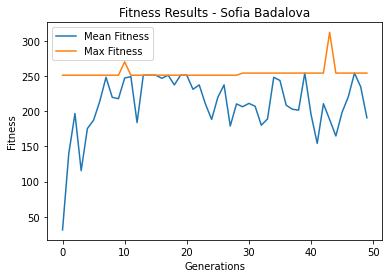

In [9]:
""" 
This is the code output to run for problem 2 
"""
if __name__ == '__main__':
    # Setting up variables
    weights = [18, 9, 23, 20, 59, 61, 70, 75, 76, 30]
    values = [78, 35, 89, 36, 94, 75, 74, 79, 80, 16]
    # each value associated with the position in the array is the item number. ( TODO: might not need this )
    items = np.arange(1, 11)

    # The threshold for each problem. The max amount the knapsack can hold.
    threshold_problem_1 = 103
    threshold_problem_2 = 156

    # Print out the arrays to see our items.
    print('The list is as follows:')
    print('Item No.   Weight   Value')
    for i in range(items.shape[0]):
        print('{0}          {1}         {2}\n'.format(items[i], weights[i], values[i]))

    # We set up our population
    solutions_per_population = 8
    # Here we are initialising a random population.
    population_size = (solutions_per_population, items.shape[0])
    initial_population = np.random.randint(2, size=population_size)
    initial_population = initial_population.astype(int)

    # The number of generations that we will go through to get the best solution is
    num_generations = 50

    # Print out our information
    print('The population size is: {}'.format(population_size))
    print('The initial population looks like: \n {}'.format(initial_population))

    parameters, all_fitness_results = genetic_algorithm(weights, values, initial_population, population_size,
                                                        num_generations,
                                                        threshold_problem_2)
    print('The optimized parameters for the given inputs are: \n{}'.format(parameters))
    selected_items = items * parameters
    print('\nSelected items that will maximize the knapsack without breaking it:')
    for i in range(selected_items.shape[1]):
        if selected_items[0][i] != 0:
            print('{}\n'.format(selected_items[0][i]))

    plot_results(all_fitness_results)